# Sales Forecasting with Time Series Analysis

This project aims to perform time series forecasting using the Seasonal Autoregressive Integrated Moving Average (SARIMA) model. The dataset consists of the air passengers time series data, and the goal is to predict future values based on past observations.

### Part 1: Import Libraries and Load Data

Import the necessary libraries such as pandas, numpy, and matplotlib for data manipulation and visualization. We also load the air passengers time series data from a CSV file.

```python
iimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Air Passenger dataset from a CSV file
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Display the first few rows of the dataset
df.head()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Air Passenger dataset from a CSV file
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Display the first few rows of the dataset
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Part 2: Explore and Preprocess Data

This step involves exploring the dataset to understand its structure and characteristics. We check for missing values, visualize the time series, and perform any necessary preprocessing such as handling missing values and resampling the data if needed.

```python

# Check for missing values
print(df.isnull().sum())

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Air Passenger Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Data Visualization')
plt.legend()
plt.show()

#Passengers    0
dtype: int64


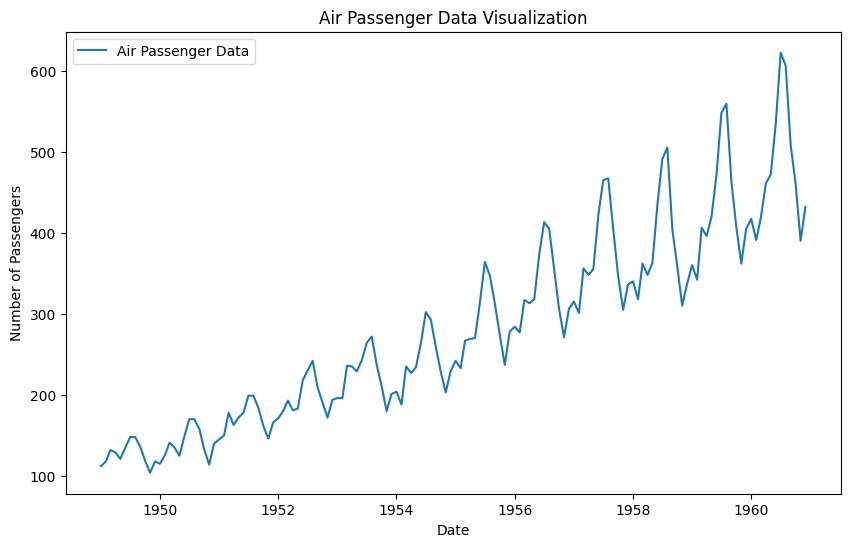

In [7]:
# Check for missing values
print(df.isnull().sum())

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Air Passenger Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Data Visualization')
plt.legend()
plt.show()

### Part 3: Define and Train SARIMA Model

In this step, we define the SARIMA model parameters and train the model on the air passengers time series data. SARIMA model is suitable for time series data with seasonality.

```python

# Define the SARIMA model
model = sm.tsa.statespace.SARIMAX(df['#Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Train the SARIMA model
results = model.fit()

# Print model summary
print(results.summary())

In [8]:
# Define the SARIMA model
model = sm.tsa.statespace.SARIMAX(df['#Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Train the SARIMA model
results = model.fit()

# Print model summary
print(results.summary())

C:\Users\Z2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Z2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 07 Jun 2024   AIC                           1022.299
Time:                                    19:55:35   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

### Part 4: Evaluate and Visualize Model Performance

In this step, we evaluate the model's performance by comparing the predicted values with the actual values. We also visualize the model's predictions to understand how well it fits the air passengers time series data and forecast future values.

```python

# Predict future values
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# Plot the predictions and actual values
ax = df['#Passengers'].plot(label='Observed', figsize=(10, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers')
plt.legend()
plt.show()

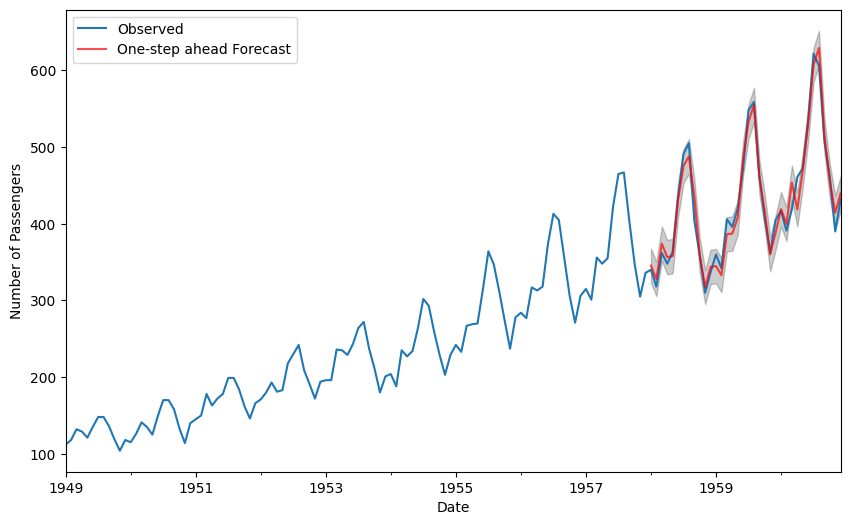

In [9]:
# Predict future values
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# Plot the predictions and actual values
ax = df['#Passengers'].plot(label='Observed', figsize=(10, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers')
plt.legend()
plt.show()